# Project: FBI Gun Data Project Nitin Ramchand Lalwani for Udacity Data Analytics Nanodegree

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project involves investigating and corssing data from two sources; one the FBI National Instant Background Check Systems (NICS) in which gun shops call in the system to check whether a potential buyer has any criminal record or is ineligible for buying guns and explosives in the shop of a particular state; and the second data set is the census dataa for the USA which gives census information and estimates per state. An important remark when analyzing the data which is already worth mentioning that the data taken from the NICS can't be used to give exact and precise figures of how many weapons have been sold since the NICS just conduct background checks. However for the analysis which will be shown below a 1-to-1 correlation will be taken as an assumption as an intial investigation but of course this could be detailed by perhaps doing surveys to the gun shops and checking what is the background check to sale rate.

__Questions to be answered in this project__<br>
1)What census data is most associated with high gun per capita? <br>
2)Which states have had the highest growth in gun registrations?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

Investiagting the census data

In [2]:
census_data = pd.read_csv('U.S. Census Data.csv')
census_data.head()

# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.


,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [3]:
census_data.shape

(85, 52)

In [4]:
census_data.describe()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,(a),(c),"""01""",7.30%,50.30%,50.90%,6.80%,3.30%,5.70%,51.60%,...,0.016,0.048,50.40%,2.50%,1.90%,"8,001,041",18.90%,1.50%,6.30%,7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


We can see already that each of the states have 65 variables but in total there is 85 rows in this census data set, in the Data Wrangling section we will clean this up so that the census_data dataframe has only the 65 non null variables and other cleaning if necessary. Furthermore, we can see that the only two columns that are not states are Fact and Fact Note and since there are total of 52 columns than we deduce there is Census data for 50 states.

In [5]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

Investigating now the NICS data set.

In [6]:
gun_data = pd.read_excel('gun_data.xlsx')
gun_data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [7]:
gun_data.shape

(12485, 27)

In [8]:
gun_data.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


We can see that the totals infromation is the only one that is complete and therefore later we will clean up later the data set to just have this column and use it as the dependant variable and map it to the census data which will have all the indenpendant variables. 

In [9]:
gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [10]:
gun_data['month'].unique()

array([u'2017-09', u'2017-08', u'2017-07', u'2017-06', u'2017-05',
       u'2017-04', u'2017-03', u'2017-02', u'2017-01', u'2016-12',
       u'2016-11', u'2016-10', u'2016-09', u'2016-08', u'2016-07',
       u'2016-06', u'2016-05', u'2016-04', u'2016-03', u'2016-02',
       u'2016-01', u'2015-12', u'2015-11', u'2015-10', u'2015-09',
       u'2015-08', u'2015-07', u'2015-06', u'2015-05', u'2015-04',
       u'2015-03', u'2015-02', u'2015-01', u'2014-12', u'2014-11',
       u'2014-10', u'2014-09', u'2014-08', u'2014-07', u'2014-06',
       u'2014-05', u'2014-04', u'2014-03', u'2014-02', u'2014-01',
       u'2013-12', u'2013-11', u'2013-10', u'2013-09', u'2013-08',
       u'2013-07', u'2013-06', u'2013-05', u'2013-04', u'2013-03',
       u'2013-02', u'2013-01', u'2012-12', u'2012-11', u'2012-10',
       u'2012-09', u'2012-08', u'2012-07', u'2012-06', u'2012-05',
       u'2012-04', u'2012-03', u'2012-02', u'2012-01', u'2011-12',
       u'2011-11', u'2011-10', u'2011-09', u'2011-08', u'2011-

In [11]:
gun_data['state'].unique()

array([u'Alabama', u'Alaska', u'Arizona', u'Arkansas', u'California',
       u'Colorado', u'Connecticut', u'Delaware', u'District of Columbia',
       u'Florida', u'Georgia', u'Guam', u'Hawaii', u'Idaho', u'Illinois',
       u'Indiana', u'Iowa', u'Kansas', u'Kentucky', u'Louisiana',
       u'Maine', u'Mariana Islands', u'Maryland', u'Massachusetts',
       u'Michigan', u'Minnesota', u'Mississippi', u'Missouri', u'Montana',
       u'Nebraska', u'Nevada', u'New Hampshire', u'New Jersey',
       u'New Mexico', u'New York', u'North Carolina', u'North Dakota',
       u'Ohio', u'Oklahoma', u'Oregon', u'Pennsylvania', u'Puerto Rico',
       u'Rhode Island', u'South Carolina', u'South Dakota', u'Tennessee',
       u'Texas', u'Utah', u'Vermont', u'Virgin Islands', u'Virginia',
       u'Washington', u'West Virginia', u'Wisconsin', u'Wyoming'],
      dtype=object)

Quick check that the number of unique states multiplied by unique months is equal to the total size of the dataset to confirm that there is information for each of the time steps recorded for all of the states and no repeated value or cleaning to be done in this sense. However we see that the length of unique states is 55 and not 50 so in the Data Wrangling this will  be explored to see what cleaning has be done in this aspect.

In [12]:
print len(gun_data)
print len(gun_data['state'].unique())
print len(gun_data['month'].unique())
print (len(gun_data['month'].unique())*len(gun_data['state'].unique()))

12485
55
227
12485



### Data Cleaning

First start cleaning the NICS data.

In [13]:
df_gun = gun_data[['month','state','totals']]
df_gun.head()

,month,state,totals
0,2017-09,Alabama,32019
1,2017-09,Alaska,6303
2,2017-09,Arizona,28394
3,2017-09,Arkansas,17747
4,2017-09,California,123506


In [14]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 3 columns):
month     12485 non-null object
state     12485 non-null object
totals    12485 non-null int64
dtypes: int64(1), object(2)
memory usage: 292.7+ KB


As we see that the month column is of type string we will convert this to date time to be able to select ranges of dates later on. 

In [15]:
df_gun.loc[:,'month'] = pd.to_datetime(df_gun.loc[:,'month'], yearfirst=True, format="%Y-%M")

C:\Users\RAMCHAND_N\AppData\Local\Continuum\anaconda3\envs\py27\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


As we see below the month column has been converted into a datetime type.

In [16]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 3 columns):
month     12485 non-null datetime64[ns]
state     12485 non-null object
totals    12485 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 292.7+ KB


In [17]:
df_gun.head()

,month,state,totals
0,2017-01-01 00:09:00,Alabama,32019
1,2017-01-01 00:09:00,Alaska,6303
2,2017-01-01 00:09:00,Arizona,28394
3,2017-01-01 00:09:00,Arkansas,17747
4,2017-01-01 00:09:00,California,123506


As we mentioned there are 55 states here whilst in the census data there are 50 states therefore we want to eliminate the rows for the states that are not relevant.

In [18]:
len(df_gun['state'].unique())

55

In the following table we see that there is at least one value which has in totals a 0 value.

In [19]:
df_gun.describe()

,totals
count,12485.000000
mean,21595.725911
std,32591.418387
min,0.000000
25%,4638.000000
50%,12399.000000
75%,25453.000000
max,541978.000000


Then we try and find what are the states which have 0 values to see if there are 5. However with this method there are just 4.

In [20]:
df_gun[df_gun['totals'] == 0].groupby('state').sum()[['totals']]

,totals
state,
District of Columbia,0
Guam,0
Mariana Islands,0
Virgin Islands,0


Therefore we will just compare what are the states in gun data set that are not in the census data. First getting all 50 states in the census data set.

In [21]:
census_state = census_data.iloc[0].index
census_state

Index([u'Fact', u'Fact Note', u'Alabama', u'Alaska', u'Arizona', u'Arkansas',
       u'California', u'Colorado', u'Connecticut', u'Delaware', u'Florida',
       u'Georgia', u'Hawaii', u'Idaho', u'Illinois', u'Indiana', u'Iowa',
       u'Kansas', u'Kentucky', u'Louisiana', u'Maine', u'Maryland',
       u'Massachusetts', u'Michigan', u'Minnesota', u'Mississippi',
       u'Missouri', u'Montana', u'Nebraska', u'Nevada', u'New Hampshire',
       u'New Jersey', u'New Mexico', u'New York', u'North Carolina',
       u'North Dakota', u'Ohio', u'Oklahoma', u'Oregon', u'Pennsylvania',
       u'Rhode Island', u'South Carolina', u'South Dakota', u'Tennessee',
       u'Texas', u'Utah', u'Vermont', u'Virginia', u'Washington',
       u'West Virginia', u'Wisconsin', u'Wyoming'],
      dtype='object')

Getting rid of the first two elements since they are not states.

In [22]:
census_state = census_state [2:]
census_state

Index([u'Alabama', u'Alaska', u'Arizona', u'Arkansas', u'California',
       u'Colorado', u'Connecticut', u'Delaware', u'Florida', u'Georgia',
       u'Hawaii', u'Idaho', u'Illinois', u'Indiana', u'Iowa', u'Kansas',
       u'Kentucky', u'Louisiana', u'Maine', u'Maryland', u'Massachusetts',
       u'Michigan', u'Minnesota', u'Mississippi', u'Missouri', u'Montana',
       u'Nebraska', u'Nevada', u'New Hampshire', u'New Jersey', u'New Mexico',
       u'New York', u'North Carolina', u'North Dakota', u'Ohio', u'Oklahoma',
       u'Oregon', u'Pennsylvania', u'Rhode Island', u'South Carolina',
       u'South Dakota', u'Tennessee', u'Texas', u'Utah', u'Vermont',
       u'Virginia', u'Washington', u'West Virginia', u'Wisconsin', u'Wyoming'],
      dtype='object')

In [23]:
len(census_state)

50

In [24]:
gun_state = df_gun['state'].unique()
gun_state

array([u'Alabama', u'Alaska', u'Arizona', u'Arkansas', u'California',
       u'Colorado', u'Connecticut', u'Delaware', u'District of Columbia',
       u'Florida', u'Georgia', u'Guam', u'Hawaii', u'Idaho', u'Illinois',
       u'Indiana', u'Iowa', u'Kansas', u'Kentucky', u'Louisiana',
       u'Maine', u'Mariana Islands', u'Maryland', u'Massachusetts',
       u'Michigan', u'Minnesota', u'Mississippi', u'Missouri', u'Montana',
       u'Nebraska', u'Nevada', u'New Hampshire', u'New Jersey',
       u'New Mexico', u'New York', u'North Carolina', u'North Dakota',
       u'Ohio', u'Oklahoma', u'Oregon', u'Pennsylvania', u'Puerto Rico',
       u'Rhode Island', u'South Carolina', u'South Dakota', u'Tennessee',
       u'Texas', u'Utah', u'Vermont', u'Virgin Islands', u'Virginia',
       u'Washington', u'West Virginia', u'Wisconsin', u'Wyoming'],
      dtype=object)

In [25]:
len (gun_state)

55

Finding the 5 states that are in gun_state and not in census_state

In [26]:
for state in gun_state:
    if state not in census_state:
        print (state)

District of Columbia
Guam
Mariana Islands
Puerto Rico
Virgin Islands


Since this means that there is no census data for these states and in fact in the NICS data set 4 out of 5 of these states have 0 values on their totals then we will eliminate them from this analysis and work with the 50 states for which there is census data. 

In [27]:
df_gun.head()

,month,state,totals
0,2017-01-01 00:09:00,Alabama,32019
1,2017-01-01 00:09:00,Alaska,6303
2,2017-01-01 00:09:00,Arizona,28394
3,2017-01-01 00:09:00,Arkansas,17747
4,2017-01-01 00:09:00,California,123506


Have created another dataframe called df_gun_50_states that has all gun data for the 50 states that are present in the census data set. And we can already see that the indexes of the states mentioned above are not included neither are they present in the states column.

In [28]:
df_gun_50_states = df_gun[~((df_gun['state'] == 'District of Columbia')|(df_gun['state'] == 'Guam')|(df_gun['state'] == 'Mariana Islands')|(df_gun['state'] == 'Puerto Rico')|(df_gun['state'] == 'Virgin Islands'))]
df_gun_50_states.head(20)

,month,state,totals
0,2017-01-01 00:09:00,Alabama,32019
1,2017-01-01 00:09:00,Alaska,6303
2,2017-01-01 00:09:00,Arizona,28394
3,2017-01-01 00:09:00,Arkansas,17747
4,2017-01-01 00:09:00,California,123506
5,2017-01-01 00:09:00,Colorado,35873
6,2017-01-01 00:09:00,Connecticut,12117
7,2017-01-01 00:09:00,Delaware,3502
9,2017-01-01 00:09:00,Florida,77390
10,2017-01-01 00:09:00,Georgia,35371


But just to robustify and check the length of this new dataframe is equal to the old one menos 5 (which are the number of states removed) multiplied by the number of repeated timesteps that each state appears in the gun data set. 

In [29]:
print len(df_gun_50_states)
print len(df_gun) - 5*len(df_gun['month'].unique())

11350
11350


In [30]:
df_gun_50_states = df_gun_50_states.reset_index(drop=True)
df_gun_50_states.head(20)

,month,state,totals
0,2017-01-01 00:09:00,Alabama,32019
1,2017-01-01 00:09:00,Alaska,6303
2,2017-01-01 00:09:00,Arizona,28394
3,2017-01-01 00:09:00,Arkansas,17747
4,2017-01-01 00:09:00,California,123506
5,2017-01-01 00:09:00,Colorado,35873
6,2017-01-01 00:09:00,Connecticut,12117
7,2017-01-01 00:09:00,Delaware,3502
8,2017-01-01 00:09:00,Florida,77390
9,2017-01-01 00:09:00,Georgia,35371


Now it is time to clean up the census data set.

In [31]:
census_data.describe()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,(a),(c),"""01""",7.30%,50.30%,50.90%,6.80%,3.30%,5.70%,51.60%,...,0.016,0.048,50.40%,2.50%,1.90%,"8,001,041",18.90%,1.50%,6.30%,7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


When looking at the full data set, it seems that it is the last 20 rows have NaN values for each of the states and in that case we would drop all of these values.

In [32]:
census_data

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
5,"Persons under 5 years, percent, April 1, 2010",NaN,6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,...,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
6,"Persons under 18 years, percent, July 1, 2016,...",NaN,22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
7,"Persons under 18 years, percent, April 1, 2010",NaN,23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
8,"Persons 65 years and over, percent, July 1, 2...",NaN,16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
9,"Persons 65 years and over, percent, April 1, 2010",NaN,13.80%,7.70%,13.80%,14.40%,11.40%,10.90%,14.20%,14.40%,...,0.143,0.134,10.30%,9.00%,14.60%,12.20%,12.30%,16.00%,13.70%,12.40%


20 rows that had less than 5 NaN values in each row have been dropped since there is no information for these variables.

In [33]:
df_census = census_data.dropna(axis=0,thresh=5)
df_census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 0 to 64
Data columns (total 52 columns):
Fact              65 non-null object
Fact Note         16 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

Next, the Fact Note column is dropped since it is not useful to answer the questions that we are trying to answer.

In [34]:
df_census.drop('Fact Note', axis=1, inplace = True)
df_census.head()

C:\Users\RAMCHAND_N\AppData\Local\Continuum\anaconda3\envs\py27\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


As shown above all of the values of the dataframe are strings, for all the values for the states we convert these values into numeric ones having converted %, $ as well to just numeric values. Firstly we see that there are no values in the dataframe that have NaN or 0 as a string.

In [35]:
df_census[(df_census.values == 'NaN') |(df_census.values == '0')]

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming


The following two functions are useful to parse percent and dollars strings.

In [36]:
def parse_str_percent(str_percent):
    return float(str_percent.strip("%"))/100
def parse_str_dollar_with_coma(str_dollar_with_coma):
    return float(str_dollar_with_coma.strip("$").replace(",","")) 

To change values we will define a function that goes through each of the values for each column and on a for loop that will loop for all relevant columns (i.e. all columns of the census data frame except for the 'Fact' one)


In [37]:
def parse_values_column(df, column_index):
    #for each element of a column which means as many as rows of the dataframe (df.shape[0] gives us the length of df, i.e. number of rows)
    column = df[column_index]

    for i in range(df.shape[0]):
        
        if "%" in column[i]:
            column[i] = parse_str_percent(column[i])
        elif "$" in column[i]:
            column[i] = parse_str_dollar_with_coma(column[i])
        else:
            try:
                column[i] = float(column[i].replace(",",""))
            except ValueError:
                try:
                    column[i] = int(column[i].replace(",",""))
                except ValueError:
                    try:
                        column[i] = float(column[i])
                    except ValueError:
                        column[i] = np.nan
                
    #Just in case there are any NaN value sin the table
    
    return column

            

In [38]:
for state in df_census.columns[df_census.columns != 'Fact']:
    df_census.loc[:,state] = parse_values_column(df_census, state)


C:\Users\RAMCHAND_N\AppData\Local\Continuum\anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\RAMCHAND_N\AppData\Local\Continuum\anaconda3\envs\py27\lib\site-packages\pandas\core\indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [39]:
df_census.head()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",4.8633e+06,741894,6.93107e+06,2.98825e+06,3.925e+07,5.54054e+06,3.57645e+06,952065,2.06124e+07,...,865454,6.65119e+06,2.78626e+07,3.05122e+06,624594,8.41181e+06,7.288e+06,1.8311e+06,5.77871e+06,585501
1,"Population estimates base, April 1, 2010, (V2...",4.78013e+06,710249,6.3923e+06,2.91602e+06,3.72545e+07,5.02932e+06,3.57411e+06,897936,1.88046e+07,...,814195,6.3463e+06,2.51461e+07,2.76389e+06,625741,8.00104e+06,6.72454e+06,1.85301e+06,5.68729e+06,563767
2,"Population, percent change - April 1, 2010 (es...",0.017,0.045,0.084,0.025,0.054,0.102,0.001,0.06,0.096,...,0.063,0.048,0.108,0.104,-0.002,0.051,0.084,-0.012,0.016,0.039
3,"Population, Census, April 1, 2010",4.77974e+06,710231,6.39202e+06,2.91592e+06,3.7254e+07,5.0292e+06,3.5741e+06,897934,1.88013e+07,...,814180,6.34610e+06,2.51456e+07,2.76388e+06,625741,8.00102e+06,6.72454e+06,1.85299e+06,5.68699e+06,563626
4,"Persons under 5 years, percent, July 1, 2016, ...",0.06,0.073,0.063,0.064,0.063,0.061,0.052,0.058,0.055,...,0.071,0.061,0.072,0.083,0.049,0.061,0.062,0.055,0.058,0.065


The FIPS Code row we eliminate since it is not data that will be useful for our analysis.

In [40]:
df_census.drop(64, inplace=True)
df_census.shape


(64, 51)

There are still some rows with NaN values 

In [41]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 63
Data columns (total 51 columns):
Fact              64 non-null object
Alabama           64 non-null object
Alaska            63 non-null object
Arizona           64 non-null object
Arkansas          64 non-null object
California        64 non-null object
Colorado          64 non-null object
Connecticut       64 non-null object
Delaware          64 non-null object
Florida           64 non-null object
Georgia           64 non-null object
Hawaii            63 non-null object
Idaho             64 non-null object
Illinois          64 non-null object
Indiana           64 non-null object
Iowa              64 non-null object
Kansas            64 non-null object
Kentucky          64 non-null object
Louisiana         64 non-null object
Maine             63 non-null object
Maryland          64 non-null object
Massachusetts     64 non-null object
Michigan          63 non-null object
Minnesota         64 non-null object
Mississip

In the next loop, the NaN values found for some of the rows are filled with the row averages.

In [42]:
for i, col in enumerate(df_census):
        df_census.iloc[:, i] = df_census.iloc[:, i].fillna(df_census.mean(axis=1))
        

Now the census data set can be considered to be cleaned up and ready to use in the exploration phase. This dataframe may still be filtered and transposed and so on but this will be done separetly when trying to answer each research question. 

In [43]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 63
Data columns (total 51 columns):
Fact              64 non-null object
Alabama           64 non-null float64
Alaska            64 non-null float64
Arizona           64 non-null float64
Arkansas          64 non-null float64
California        64 non-null float64
Colorado          64 non-null float64
Connecticut       64 non-null float64
Delaware          64 non-null float64
Florida           64 non-null float64
Georgia           64 non-null float64
Hawaii            64 non-null float64
Idaho             64 non-null float64
Illinois          64 non-null float64
Indiana           64 non-null float64
Iowa              64 non-null float64
Kansas            64 non-null float64
Kentucky          64 non-null float64
Louisiana         64 non-null float64
Maine             64 non-null float64
Maryland          64 non-null float64
Massachusetts     64 non-null float64
Michigan          64 non-null float64
Minnesota         64 non

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: What census data is most associated with high gun per capita?

In order to answer this question we will first group the all of the gun data and get a sum of all the totals for all the months for which there is data so from November of 1998 till September of 2017.

In [44]:
df_gun_50_states.head()

,month,state,totals
0,2017-01-01 00:09:00,Alabama,32019
1,2017-01-01 00:09:00,Alaska,6303
2,2017-01-01 00:09:00,Arizona,28394
3,2017-01-01 00:09:00,Arkansas,17747
4,2017-01-01 00:09:00,California,123506


In [45]:
df_gun_state_totals = df_gun_50_states.groupby('state').sum()
df_gun_state_totals

,totals
state,
Alabama,6706079
Alaska,1137643
Arizona,4425714
Arkansas,3752633
California,19014063
Colorado,6058482
Connecticut,3168126
Delaware,491369
Florida,11695777


Now we tranpose the census data matrix so that the states appear and row indexes and then we can merge easily the dataframe of the totals calculated above easily.

In [46]:
df_census_transposed = df_census.transpose()
df_census_transposed.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
Alabama,4.8633e+06,4.78013e+06,0.017,4.77974e+06,0.06,0.064,0.226,0.237,0.161,0.138,...,322025,374153,203604,137630,92219,272651,41943,316984,94.4,50645.3
Alaska,741894,710249,0.045,710231,0.073,0.076,0.252,0.264,0.104,0.077,...,55521,68032,35402,22141,13688,51147,7953,56091,1.2,570641
Arizona,6.93107e+06,6.3923e+06,0.084,6.39202e+06,0.063,0.071,0.235,0.255,0.169,0.138,...,451951,499926,245243,182425,135313,344981,46780,427582,56.3,113594
Arkansas,2.98825e+06,2.91602e+06,0.025,2.91592e+06,0.064,0.068,0.236,0.244,0.163,0.144,...,198380,231959,123158,75962,35982,189029,25915,192988,56,52035.5


In [47]:
df_merge_census_gun_by_state = df_census_transposed.merge(df_gun_state_totals,how='left',left_index=True,right_index=True)
df_merge_census_gun_by_state.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,totals
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",NaN
Alabama,4.8633e+06,4.78013e+06,0.017,4.77974e+06,0.06,0.064,0.226,0.237,0.161,0.138,...,374153,203604,137630,92219,272651,41943,316984,94.4,50645.3,6706079.0
Alaska,741894,710249,0.045,710231,0.073,0.076,0.252,0.264,0.104,0.077,...,68032,35402,22141,13688,51147,7953,56091,1.2,570641,1137643.0
Arizona,6.93107e+06,6.3923e+06,0.084,6.39202e+06,0.063,0.071,0.235,0.255,0.169,0.138,...,499926,245243,182425,135313,344981,46780,427582,56.3,113594,4425714.0
Arkansas,2.98825e+06,2.91602e+06,0.025,2.91592e+06,0.064,0.068,0.236,0.244,0.163,0.144,...,231959,123158,75962,35982,189029,25915,192988,56,52035.5,3752633.0


To solve the research question we look at the correlation of each of the variables defined in the fact row and using the 50 data points for each of the states and the their corresponding totals, we see if there is a correlation between the 64 independant variables and the dependant variable totals.

The following function was coded during the learning session of this course.

In [48]:
def correlation(x, y):
    
    std_from_mean_x = (x - x.mean())/x.std(ddof=0)
    std_from_mean_y = (y - y.mean())/y.std(ddof=0)
    
    correlation = (std_from_mean_x * std_from_mean_y).mean()
    
    '''
    Fill in this function to compute the correlation between the two
    input variables. Each input is either a NumPy array or a Pandas
    Series.
    
    correlation = average of (x in standard units) times (y in standard units)
    
    Remember to pass the argument "ddof=0" to the Pandas std() function!
    '''
    return correlation

Next we create a dictionary in which we store each of the independant variables stated under the 'Fact' row.

In [49]:
dict_census_fact_variables = {}
for i in range(df_merge_census_gun_by_state.shape[1]-1):
    dict_census_fact_variables[i] = df_merge_census_gun_by_state.loc['Fact'][i]
dict_census_fact_variables

{0: 'Population estimates, July 1, 2016,  (V2016)',
 1: 'Population estimates base, April 1, 2010,  (V2016)',
 2: 'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
 3: 'Population, Census, April 1, 2010',
 4: 'Persons under 5 years, percent, July 1, 2016,  (V2016)',
 5: 'Persons under 5 years, percent, April 1, 2010',
 6: 'Persons under 18 years, percent, July 1, 2016,  (V2016)',
 7: 'Persons under 18 years, percent, April 1, 2010',
 8: 'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
 9: 'Persons 65 years and over, percent, April 1, 2010',
 10: 'Female persons, percent,  July 1, 2016,  (V2016)',
 11: 'Female persons, percent, April 1, 2010',
 12: 'White alone, percent, July 1, 2016,  (V2016)',
 13: 'Black or African American alone, percent, July 1, 2016,  (V2016)',
 14: 'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
 15: 'Asian alone, percent, July 1, 2016,  (V2016)',
 16: 'Native Hawaiian and Other Paci

Next we create a dictionary where we will store all the correlation coefficients calculated for each of the independant variables defined above vs the totals dependant variable.

In [50]:
dict_correlation_coefficients = {}
for i in range(df_merge_census_gun_by_state.shape[1]-1):
    dict_correlation_coefficients[i] = correlation(df_merge_census_gun_by_state.iloc[1:,i] , df_merge_census_gun_by_state.iloc[1:,-1])
dict_correlation_coefficients

{0: 0.6496966330681282,
 1: 0.6495825003117268,
 2: 0.03633167694885145,
 3: 0.6495802323858313,
 4: 0.056013535483879426,
 5: 0.06405757402243122,
 6: 0.10979674355923576,
 7: 0.13615779772033293,
 8: -0.16944416854084401,
 9: -0.13589597866552466,
 10: 0.16916151071559085,
 11: 0.15310196572967405,
 12: 0.011658107990679614,
 13: 0.14432647083998934,
 14: -0.22842994616222423,
 15: -0.022283783763407724,
 16: -0.15418606273904895,
 17: -0.1606358259703953,
 18: 0.22636155365442798,
 19: -0.1467097089599706,
 20: 0.6732376197999694,
 21: 0.17456504695601688,
 22: 0.6572524620322112,
 23: 0.6554596316363296,
 24: -0.12558218903945623,
 25: -0.15470659826969946,
 26: -0.09876241517370142,
 27: -0.1742941038224502,
 28: -0.06436776960569153,
 29: 0.5836773619731915,
 30: 0.6573327576816765,
 31: 0.16681155640330622,
 32: 0.03479271510845887,
 33: 0.194890769747963,
 34: -0.47595853034921853,
 35: -0.1672324339790431,
 36: 0.14601390161510353,
 37: 0.09178201038313244,
 38: -0.26599961202

Now we would like to understand what are the highest positive correlations and most negative correlations and for that we would like to sort the dictionary. As dictionaries are unordered we will create a list to sort it and then understand what are the 5 most positive correlations keys and 5 most negative correlations. 

In [51]:
import operator

sorted_correlations_ascending = sorted(dict_correlation_coefficients.items(), key=operator.itemgetter(1))
sorted_correlations_ascending

[(34, -0.47595853034921853),
 (39, -0.32460497675907496),
 (45, -0.29365875990053153),
 (38, -0.2659996120255543),
 (14, -0.22842994616222423),
 (47, -0.21455491062143003),
 (48, -0.1902797445749355),
 (27, -0.1742941038224502),
 (8, -0.16944416854084401),
 (35, -0.1672324339790431),
 (17, -0.1606358259703953),
 (25, -0.15470659826969946),
 (16, -0.15418606273904895),
 (19, -0.1467097089599706),
 (9, -0.13589597866552466),
 (24, -0.12558218903945623),
 (26, -0.09876241517370142),
 (62, -0.0739822789463539),
 (28, -0.06436776960569153),
 (15, -0.022283783763407724),
 (12, 0.011658107990679614),
 (32, 0.03479271510845887),
 (2, 0.03633167694885145),
 (4, 0.056013535483879426),
 (5, 0.06405757402243122),
 (63, 0.08750873353687039),
 (37, 0.09178201038313244),
 (6, 0.10979674355923576),
 (7, 0.13615779772033293),
 (13, 0.14432647083998934),
 (36, 0.14601390161510353),
 (11, 0.15310196572967405),
 (31, 0.16681155640330622),
 (10, 0.16916151071559085),
 (21, 0.17456504695601688),
 (33, 0.194

In [52]:
negative_correlation_top5 =[fact_index[0] for fact_index in sorted_correlations_ascending[0:5]]
negative_correlation_top5

[34, 39, 45, 38, 14]

In [53]:
positive_correlation_top5 =[fact_index[0] for fact_index in sorted_correlations_ascending[-5:]]
positive_correlation_top5

[23, 22, 30, 42, 20]

The following will print the 5 most positively correlated variables with the totals (guns acquired from 1998 to 2017) variable using the 50 states as data points to compute the Pearson's correlation coefficient.   

In [54]:
print ("Defined below are Pearson's correlation coefficient of census data variables with total number of guns acquired from 1998 to 2017. The 5 most positively correlated variables are shown:")
print("")
for x in positive_correlation_top5:
    print (str(round(dict_correlation_coefficients[x],7)) + " : " + str(dict_census_fact_variables[x]))
    

Defined below are Pearson's correlation coefficient of census data variables with total number of guns acquired from 1998 to 2017. The 5 most positively correlated variables are shown:

0.6554596 : Housing units, April 1, 2010
0.6572525 : Housing units,  July 1, 2016,  (V2016)
0.6573328 : Households, 2011-2015
0.6727148 : Total manufacturers shipments, 2012 ($1,000)
0.6732376 : Veterans, 2011-2015


Next we do the same for the 5 most negatively correlated variables with the totals

In [55]:
print ("Defined below are Pearson's correlation coefficient of census data variables with total number of guns acquired from 1998 to 2017. The 5 most negatively correlated variables are shown:")
print("")
for x in negative_correlation_top5:
    print (str(round(dict_correlation_coefficients[x],7)) + " : " + str(dict_census_fact_variables[x]))
   

Defined below are Pearson's correlation coefficient of census data variables with total number of guns acquired from 1998 to 2017. The 5 most negatively correlated variables are shown:

-0.4759585 : High school graduate or higher, percent of persons age 25 years+, 2011-2015
-0.324605 : In civilian labor force, female, percent of population age 16 years+, 2011-2015
-0.2936588 : Total retail sales per capita, 2012
-0.2659996 : In civilian labor force, total, percent of population age 16 years+, 2011-2015
-0.2284299 : American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)


The results above show that the __most positively correlated__ census data type to the total number of background checks performed from 1998 to 2017 is the __Veterans__ with a Pearson's correlation Coefficient of __0.6732376__

And secondly the __most negatively correlated__ census data type to the total number of background check performed from 2998 to 2017 is the __High School Graduate or Higher__ with a Pearson's correlation Coefficient of __-0.4759585__ but the correlations isn't that strong as for the __Veterans__ census data type. 

Next we will show some Data Visualizations for some of the variables mentioned above

But first we observe that the merged dataframe doesn't have numeric values as types.

In [56]:
df_merge_census_gun_by_state.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Fact to Wyoming
Data columns (total 65 columns):
0         51 non-null object
1         51 non-null object
2         51 non-null object
3         51 non-null object
4         51 non-null object
5         51 non-null object
6         51 non-null object
7         51 non-null object
8         51 non-null object
9         51 non-null object
10        51 non-null object
11        51 non-null object
12        51 non-null object
13        51 non-null object
14        51 non-null object
15        51 non-null object
16        51 non-null object
17        51 non-null object
18        51 non-null object
19        51 non-null object
20        51 non-null object
21        51 non-null object
22        51 non-null object
23        51 non-null object
24        51 non-null object
25        51 non-null object
26        51 non-null object
27        51 non-null object
28        51 non-null object
29        51 non-null object
30        51 non-null ob

In [57]:
df_merged_plot = df_merge_census_gun_by_state.loc['Alabama':,:'totals']

In [58]:
df_merged_plot = df_merged_plot.apply(pd.to_numeric)

In [59]:
df_merged_plot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 65 columns):
0         50 non-null float64
1         50 non-null float64
2         50 non-null float64
3         50 non-null float64
4         50 non-null float64
5         50 non-null float64
6         50 non-null float64
7         50 non-null float64
8         50 non-null float64
9         50 non-null float64
10        50 non-null float64
11        50 non-null float64
12        50 non-null float64
13        50 non-null float64
14        50 non-null float64
15        50 non-null float64
16        50 non-null float64
17        50 non-null float64
18        50 non-null float64
19        50 non-null float64
20        50 non-null float64
21        50 non-null float64
22        50 non-null float64
23        50 non-null float64
24        50 non-null float64
25        50 non-null float64
26        50 non-null float64
27        50 non-null float64
28        50 non-null float64
29        50 non-null

In [60]:
df_merged_plot.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,totals
Alabama,4863300.0,4780131.0,0.017,4779736.0,0.060,0.064,0.226,0.237,0.161,0.138,...,374153.0,203604.0,137630.0,92219.0,272651.0,41943.0,316984.0,94.4,50645.33,6706079.0
Alaska,741894.0,710249.0,0.045,710231.0,0.073,0.076,0.252,0.264,0.104,0.077,...,68032.0,35402.0,22141.0,13688.0,51147.0,7953.0,56091.0,1.2,570640.95,1137643.0
Arizona,6931071.0,6392301.0,0.084,6392017.0,0.063,0.071,0.235,0.255,0.169,0.138,...,499926.0,245243.0,182425.0,135313.0,344981.0,46780.0,427582.0,56.3,113594.08,4425714.0
Arkansas,2988248.0,2916025.0,0.025,2915918.0,0.064,0.068,0.236,0.244,0.163,0.144,...,231959.0,123158.0,75962.0,35982.0,189029.0,25915.0,192988.0,56.0,52035.48,3752633.0
California,39250017.0,37254522.0,0.054,37253956.0,0.063,0.068,0.232,0.250,0.136,0.114,...,3548449.0,1852580.0,1320085.0,1619857.0,1819107.0,252377.0,3176341.0,239.1,155779.22,19014063.0


In [61]:
df_veterans = df_merged_plot.loc[:,[20,'totals']]
df_veterans.head()

,20,totals
Alabama,363170.0,6706079.0
Alaska,69323.0,1137643.0
Arizona,505794.0,4425714.0
Arkansas,220953.0,3752633.0
California,1777410.0,19014063.0


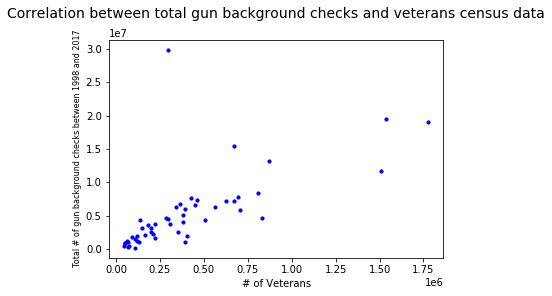

In [62]:
plot_veterans = df_veterans.plot(kind='scatter',x=20, y='totals', s=10, c='Blue')
plot_veterans.set_title('Correlation between total gun background checks and veterans census data\n', fontsize=14)

plot_veterans.set_ylabel("Total # of gun background checks between 1998 and 2017", fontsize=8)
plot_veterans.set_xlabel("# of Veterans")
plot_veterans.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


C:\Users\RAMCHAND_N\AppData\Local\Continuum\anaconda3\envs\py27\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


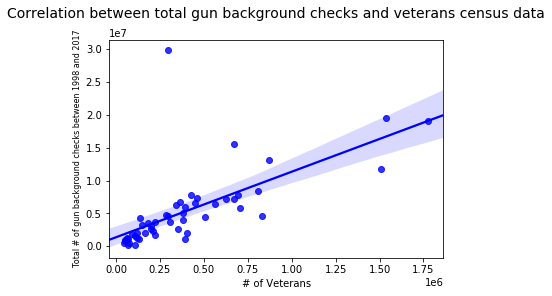

In [63]:
plot_veterans_sns = sns.regplot(x=df_merged_plot.loc[:,20], y=df_merged_plot.loc[:,'totals'], color="Blue")
plot_veterans_sns.set_title('Correlation between total gun background checks and veterans census data\n', fontsize=14)

plot_veterans_sns.set_ylabel("Total # of gun background checks between 1998 and 2017", fontsize=8)
plot_veterans_sns.set_xlabel("# of Veterans")
plot_veterans_sns.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

The point that is quite outisde of the general trend is for the state of California.

In [64]:
df_merged_plot.loc[:,20].idxmax()

'California'

Now will plot the most negatively correlated variable which is the __High Scool Graduate or higher__ versus the total number of background checks conducted when trying to purchase guns from 1998 to 2017.

In [65]:
df_higher_graduates = df_merged_plot.loc[:,[34,'totals']]
df_higher_graduates.head()

,34,totals
Alabama,0.843,6706079.0
Alaska,0.921,1137643.0
Arizona,0.860,4425714.0
Arkansas,0.848,3752633.0
California,0.818,19014063.0


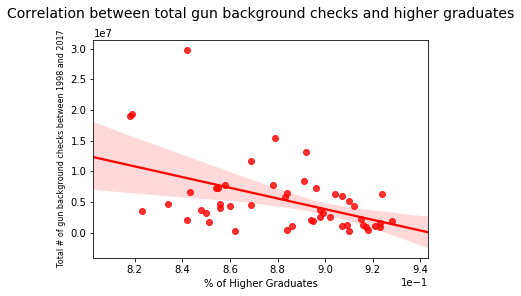

In [66]:
ax1 = sns.regplot(x=df_higher_graduates.loc[:,34], y=df_higher_graduates.loc[:,'totals'], color="Red")
ax1.set_title('Correlation between total gun background checks and higher graduates\n', fontsize=14)

ax1.set_ylabel("Total # of gun background checks between 1998 and 2017", fontsize=8)
ax1.set_xlabel("% of Higher Graduates")
ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

### Research Question 2: Which states have had the highest growth in gun registrations?

In [67]:
df_gun_50_states.head()

,month,state,totals
0,2017-01-01 00:09:00,Alabama,32019
1,2017-01-01 00:09:00,Alaska,6303
2,2017-01-01 00:09:00,Arizona,28394
3,2017-01-01 00:09:00,Arkansas,17747
4,2017-01-01 00:09:00,California,123506


First we will take sum of total background check per year so that we have the information per state for each year so that we can then look at the delta from one year to another. For this we will run a loop over all the years and take a slice of the main dataframe for each of the years and then group by state and find the total sum for each of the states. Finally we add another column for each of the grouped elements as year so that when plotting the summed totals will show up as one point and will not see the evolution during the year. The df_gun_totals_per_year is a dataframe with all totals for all the years appended one after the other. 

In [68]:
year_string = {1998:'1998-01-01T00:01:00.000000000', 1999:'1999-01-01T00:01:00.000000000'
              , 2000:'2000-01-01T00:01:00.000000000', 2001:'2001-01-01T00:01:00.000000000'
              , 2002:'2002-01-01T00:01:00.000000000', 2003:'2003-01-01T00:01:00.000000000'
              , 2004:'2004-01-01T00:01:00.000000000', 2005:'2005-01-01T00:01:00.000000000'
              , 2006:'2006-01-01T00:01:00.000000000', 2007:'2007-01-01T00:01:00.000000000'
              , 2008:'2008-01-01T00:01:00.000000000', 2009:'2009-01-01T00:01:00.000000000'
              , 2010:'2010-01-01T00:01:00.000000000', 2011:'2011-01-01T00:01:00.000000000'
              , 2012:'2012-01-01T00:01:00.000000000', 2013:'2013-01-01T00:01:00.000000000'
              , 2014:'2014-01-01T00:01:00.000000000', 2015:'2015-01-01T00:01:00.000000000'
              , 2016:'2016-01-01T00:01:00.000000000', 2017:'2017-01-01T00:01:00.000000000'
              , 2018:'2018-01-01T00:01:00.000000000'}
df_gun_totals_per_year_all = pd.DataFrame()
for year in year_string:
    if year != 2018:
        df_gun_year = df_gun_50_states[(df_gun_50_states['month'] >= year_string[year]) 
                                       & (df_gun_50_states['month'] < year_string[year+1])]
        df_gun_year['year'] = df_gun_year['month'].dt.year
        df_gun_totals_per_year = df_gun_year.groupby(['state','year']).sum().reset_index().set_index('state')
        df_gun_totals_per_year_all = df_gun_totals_per_year_all.append(df_gun_totals_per_year)
df_gun_totals_per_year_all.head()

        

                                                                                    
                                                                                       
                                                                                       

C:\Users\RAMCHAND_N\AppData\Local\Continuum\anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,year,totals
state,,
Alabama,2016,616947
Alaska,2016,87647
Arizona,2016,416279
Arkansas,2016,266014
California,2016,2377167


An example of the dataframe createis shown for the state of Alabama. The columns for the slice of the dataframe shown are the year and the totals column  which shows: __total number of background checks conducted for pruchasing guns in that state for that year.__

In [69]:
df_gun_totals_per_year_all.loc['Alabama']

,year,totals
state,,
Alabama,2016,616947
Alabama,2017,336763
Alabama,1998,36568
Alabama,1999,246756
Alabama,2000,221911
Alabama,2001,230187
Alabama,2002,221008
Alabama,2003,225479
Alabama,2004,229997


Below the year column is sorted in an ascending manner to show results to the reader in a easier manner and an slice for the Alabama state is shown as an example.

In [70]:
df_gun_totals_per_year_all.sort_values('year', inplace=True)
df_gun_totals_per_year_all.loc['Alabama']

,year,totals
state,,
Alabama,1998,36568
Alabama,1999,246756
Alabama,2000,221911
Alabama,2001,230187
Alabama,2002,221008
Alabama,2003,225479
Alabama,2004,229997
Alabama,2005,235873
Alabama,2006,243176


Next another column is created in this dataframe called 'dtotal(year-(year-1))' which will take for a particular state the delta total for that year from the total from the last year. For the intial year given in the data (i.e.1998), the value in this column will be 0 since there is no delta. 

In [71]:
df_gun_totals_per_year_all['dtotal(year-(year-1))'] = np.nan


In the following section, the delta totals column created above is updated with the correct value.

In [72]:
for state in df_gun_totals_per_year_all.index.unique():
    for year in [1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]:
        df_gun_totals_per_year_all.loc[(df_gun_totals_per_year_all['year']==year) & (df_gun_totals_per_year_all.index ==state), 'dtotal(year-(year-1))'] = df_gun_totals_per_year_all[df_gun_totals_per_year_all['year']==year].loc[state,'totals'] - df_gun_totals_per_year_all[df_gun_totals_per_year_all['year']==(year-1)].loc[state,'totals']
    for year in [1998]:
        df_gun_totals_per_year_all.loc[(df_gun_totals_per_year_all['year']==year) & (df_gun_totals_per_year_all.index ==state), 'dtotal(year-(year-1))'] = 0


To show an example that this has been updated correctly, a slice of the dataframe is shown for the state of Alabama.

In [73]:
df_gun_totals_per_year_all.loc['Alabama']

,year,totals,dtotal(year-(year-1))
state,,,
Alabama,1998,36568,0.0
Alabama,1999,246756,210188.0
Alabama,2000,221911,-24845.0
Alabama,2001,230187,8276.0
Alabama,2002,221008,-9179.0
Alabama,2003,225479,4471.0
Alabama,2004,229997,4518.0
Alabama,2005,235873,5876.0
Alabama,2006,243176,7303.0


In [74]:
df_gun_dtotals_state_mean = df_gun_totals_per_year_all.groupby(df_gun_totals_per_year_all.index).mean()[['dtotal(year-(year-1))']]

In [75]:
df_gun_dtotals_state_mean.head()

,dtotal(year-(year-1))
state,
Alabama,15009.75
Alaska,2645.85
Arizona,13105.00
Arkansas,6997.10
California,55004.15


In [76]:
df_gun_dtotals_state_mean.idxmax()

dtotal(year-(year-1))    Kentucky
dtype: object

In [77]:
df_gun_dtotals_state_mean.idxmin()

dtotal(year-(year-1))    Hawaii
dtype: object

In [78]:
df_gun_totals_per_year_all.loc[['Hawaii','Kentucky']]

,year,totals,dtotal(year-(year-1))
state,,,
Hawaii,1998,431,0.0
Hawaii,1999,5343,4912.0
Hawaii,2000,6609,1266.0
Hawaii,2001,7464,855.0
Hawaii,2002,7807,343.0
Hawaii,2003,7439,-368.0
Hawaii,2004,7298,-141.0
Hawaii,2005,7575,277.0
Hawaii,2006,7588,13.0


We can see in the following plot the evolution of the total number of background checks for the state of Kentucky which is the state with the highest average increase of total number of background checks for gun pruchases from 1998 and 2017. And for comparision we can see the same for the state of Hawaii which is the state with the least increase of the total number of background checks. 

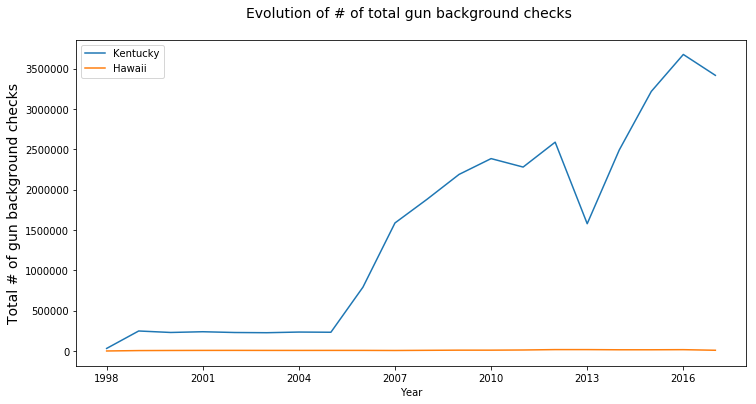

In [79]:
from matplotlib.pyplot import figure
from matplotlib.ticker import FuncFormatter, MaxNLocator
from matplotlib.pyplot import gca



fig, ax = plt.subplots(figsize=(12,6 ))

ax.plot('year', 'totals', data= df_gun_totals_per_year_all.loc['Kentucky'], label='Kentucky')
ax.plot('year', 'totals', data= df_gun_totals_per_year_all.loc['Hawaii'], label='Hawaii')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_facecolor('xkcd:white')
ax.set_title('Evolution of # of total gun background checks \n', fontsize=14)
ax.set_ylabel("Total # of gun background checks", fontsize=14)
ax.set_xlabel("Year")
#plt.xticks()
#plt.yticks()
ax.legend()


It is hard to appreciate above because of the scale but as we see below, the state of Hawaii regardless of being the state with the lowest average delta of total number of background checks for pruchase of guns, it still has increased from 1998 to 2017 but has a trend of dropping in the last years. 



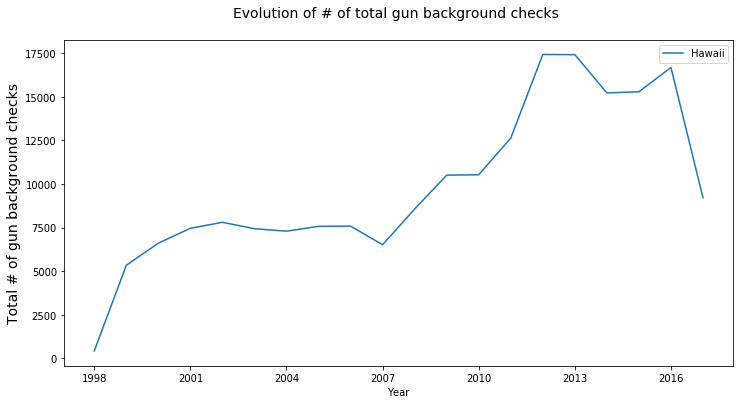

In [80]:
from matplotlib.pyplot import figure
from matplotlib.ticker import FuncFormatter, MaxNLocator
from matplotlib.pyplot import gca



fig, ax = plt.subplots(figsize=(12,6 ))

ax.plot('year', 'totals', data= df_gun_totals_per_year_all.loc['Hawaii'], label='Hawaii')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_facecolor('xkcd:white')
ax.set_title('Evolution of # of total gun background checks \n', fontsize=14)
ax.set_ylabel("Total # of gun background checks", fontsize=14)
ax.set_xlabel("Year")
#plt.xticks()
#plt.yticks()
ax.legend()

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

Part of the assumptions taken are that a firearm background check implies a firemarm sale and this is the one-to one correlation that has been made in order to show the results in this report. In reality this will vary based on state laws and purchase scenarios.

Another limiation that has been taken for the analysis provided in this report is that for some of the values that were found in the US census data since they were not numeric values but some letters for some states, they have been filled in with the mean (of the other states) value of the relevant census type.

__1) What census data is most associated with high gun per capita?__


The answer to this question was given using the Pearson's correlation coefficient calculated with comparision to the total number of background checks for gun purchases for the data collected from 1998 to 2017 by NICS: <br>
1st 0.6732376 : Veterans, 2011-2015 <br>
2nd 0.6727148 : Total manufacturers shipments, 2012 ($1,000)  <br>
3rd 0.6573328 : Households, 2011-2015 <br>
<br>
This makes sense for the Veterans and Households census data type from a sociological point of view however this analysis purely __shows correlation and not causation__ and that is why the total manufacturers shipments census data type comes up in this list because there seems to be a correlation, but we can not conclude that a causation of this variables.


__2) Which states have had the highest growth in gun registrations?__

The answer to this question was the state of __Kentuky__. The assumptions taken to answer this question were that this answer is based on a mean per year variation of the total number of background checks made per state.   

It happens shows that Kentuky is the state with the highest number of total background checks for a year

In [81]:
df_gun_totals_per_year_all['totals'].idxmax()

u'Kentucky'

However for this study this is just a coincidence and there has been no analysis done to show the link in the number of background checks made for gun purchases and the increase from the previous year which would be basically to find the correlation between the totals and the dtotals(year-(year-1)) variables.